In [1]:
set.seed(999)
options(repr.plot.width = 10, repr.plot.height = 8, warn = -1) 
library(tidyverse)
library(repr)
library(RColorBrewer)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
install.packages("ggsignif")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [3]:
library(ggsignif)

In [4]:
# read dataset + only selecting assigned variable (pH)

data <- read_csv('https://raw.githubusercontent.com/Kayleeli/BIOL342-Project/main/Data/Salish%20Creek%20Data%202022.csv', skip = 1, show_col_types = FALSE)
colnames(data) <- make.names(colnames(data))
ph_only <- data %>% select(Site, Soil.pH, Water.pH) 

head(ph_only, n = 2)

Site,Soil.pH,Water.pH
<chr>,<dbl>,<dbl>
upper,6.5,6
upper,5.5,7


In [5]:
# check if there is any NA values
sum(is.na(ph_only))

[1] 0

In [6]:
# sample size
sample_size <- ph_only %>%
    group_by(Site) %>%
    summarize(sample_size = n())

sample_size

Site,sample_size
<chr>,<int>
lower,23
upper,23


# SOIL PH

In [7]:
lower_soilpH <- 
    ph_only %>%
    filter(Site == "lower") %>%
    select(Soil.pH) %>%
    summary()

upper_soilpH <- 
    ph_only %>%
    filter(Site == "upper") %>%
    select(Soil.pH)

lower_waterpH <- 
    ph_only %>%
    filter(Site == "lower") %>%
    select(Water.pH)

upper_waterpH <- 
    ph_only %>%
    filter(Site == "upper") %>%
    select(Water.pH)

In [8]:
soilpH <- 
    ph_only %>%
    select(Site, Soil.pH) %>%
    group_by(Site) %>%
    summarize(mean = mean(Soil.pH), sd = sd(Soil.pH)/sqrt(23), t = 2.07) 
soilpH

Site,mean,sd,t
<chr>,<dbl>,<dbl>,<dbl>
lower,7.060870,0.07596263,2.07
upper,6.523913,0.11175343,2.07


In [9]:
soilpH$mean[1]
soilpH$t[1]

[1] 7.06087

[1] 2.07

In [10]:
# lower
soilpH$mean[1] -(soilpH$t[1] * soilpH$sd[1])
soilpH$mean[1]+(soilpH$t[1] * soilpH$sd[1])

[1] 6.903627

[1] 7.218112

In [11]:
soilpH$mean[2] -(soilpH$t[2] * soilpH$sd[2])
soilpH$mean[2]+(soilpH$t[2] * soilpH$sd[2])

[1] 6.292583

[1] 6.755243

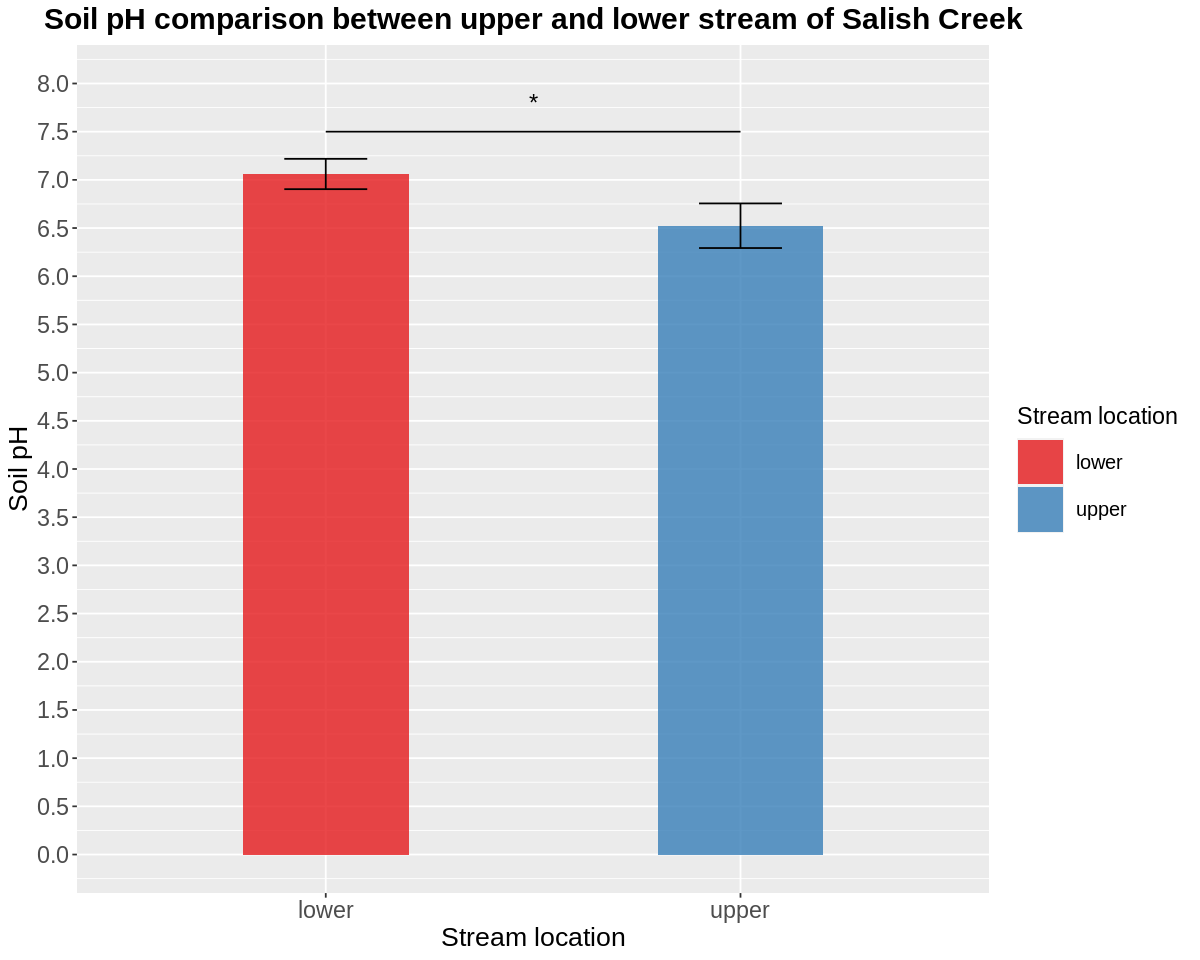

In [28]:
# soil bar graph
soilpH_bar <- 
    soilpH %>%
    ggplot(aes(x = Site, y = mean, fill = Site)) +
    scale_fill_brewer(palette="Set1") +
    geom_bar(stat= 'identity', alpha = 0.8, width = 0.4) +
    labs(x= "Stream location", y = "Soil pH", fill = "Stream location") +
    geom_errorbar(aes(x = Site, ymin=soilpH$mean-(soilpH$t * soilpH$sd), ymax=soilpH$mean+ (soilpH$t * soilpH$sd)), width=0.2, colour="black", alpha=2, size=0.5) +          
    scale_y_continuous(limits = c(0,8), breaks=seq(0,14,0.5)) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14),  legend.text= element_text(size=12), 
          axis.text=element_text(size=14), axis.title=element_text(size=16))+
    geom_line(data = tibble(x = c(1,2), y=c(7.5, 7.5)), aes(x=x, y=y), inherit.aes = FALSE) +
    geom_text(data = tibble(x = c(1.5), y=c(7.8)), aes(x=x, y=y, label = "*"), size = 5, inherit.aes = FALSE) +
    ggtitle("Soil pH comparison between upper and lower stream of Salish Creek") +
    theme(plot.title = element_text(size = 18, face = 'bold', hjust = 0.5))

soilpH_bar

In [17]:
# soilpH_boxplot <- 
#     ph_only %>%
#     select(Site, Soil.pH) %>%
#     ggplot(aes(x = Site, y = Soil.pH, fill = Site)) +
#     geom_boxplot(alpha = 0.8) +
#     scale_fill_brewer(palette="Set1") +
#     labs(x= "Site Location", y = "Soil pH") +
#     scale_y_continuous(limits = c(5,7.5), breaks=seq(0,14,0.5)) +
#     theme(legend.key.size = unit(2, 'cm'), legend.title = element_text(size=14),  legend.text= element_text(size=12), axis.text=element_text(size=20), axis.title=element_text(size=22)) 

# soilpH_boxplot

# stat_lower_soilpH <- 
#     ph_only %>%
#     filter(Site == "lower") %>%
#     select(Soil.pH) %>%
#     summary()

# WATER PH

In [29]:
waterpH <- 
    ph_only %>%
    select(Site, Water.pH) %>%
    group_by(Site) %>%
    summarize(mean = mean(Water.pH), sd = sd(Water.pH)/sqrt(23), t = 2.07) 
waterpH

Site,mean,sd,t
<chr>,<dbl>,<dbl>,<dbl>
lower,6.597826,0.08611500,2.07
upper,6.463478,0.09395695,2.07


In [30]:
# lower
waterpH$mean[2] -(waterpH$t[2] * waterpH$sd[2])
waterpH$mean[2]+(waterpH$t[2] * waterpH$sd[2])

[1] 6.268987

[1] 6.657969

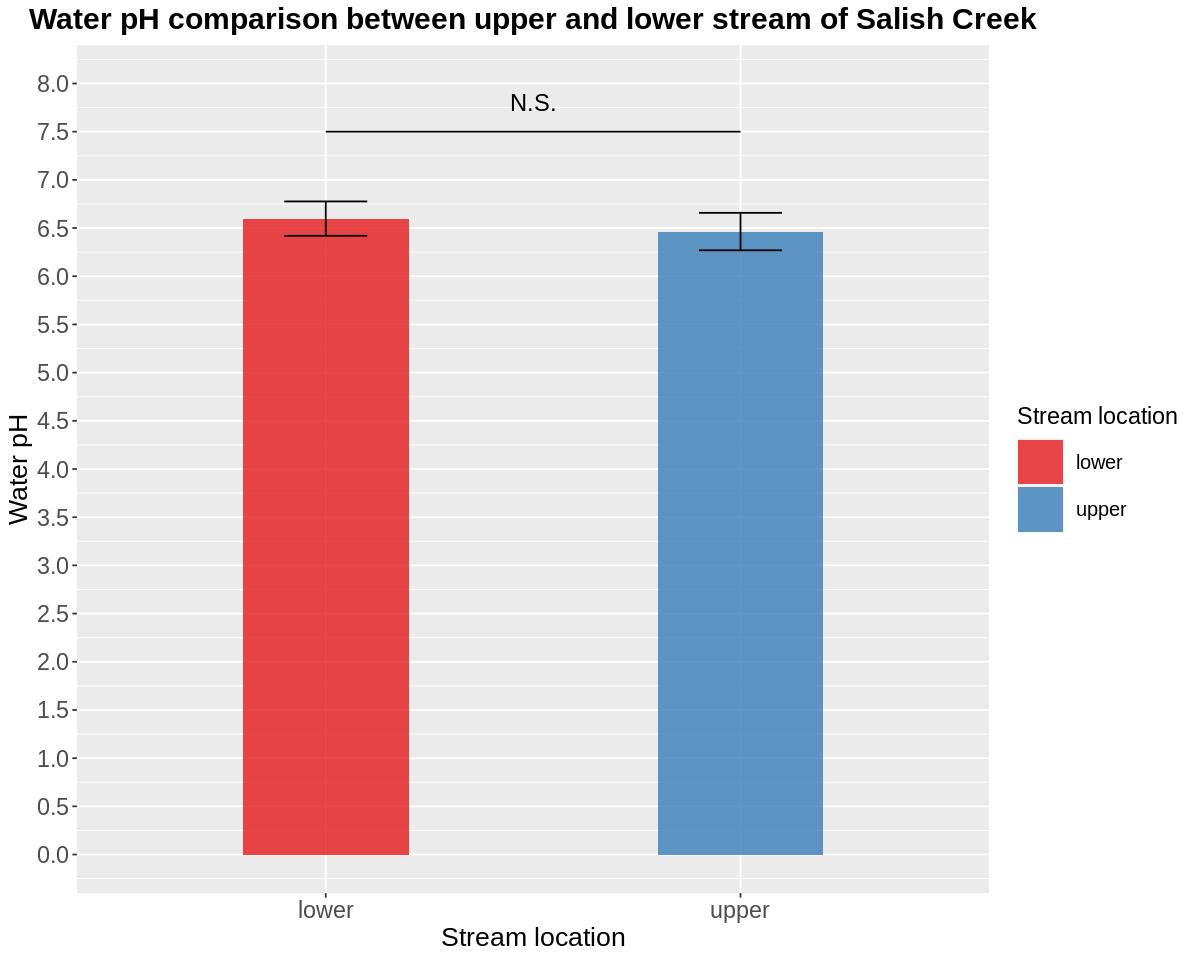

In [33]:
# soil bar graph
waterpH_bar <- 
    waterpH %>%
    ggplot(aes(x = Site, y = mean, fill = Site)) +
    scale_fill_brewer(palette="Set1") +
    geom_bar(stat= 'identity', alpha = 0.8, width = 0.4) +
    labs(x= "Stream location", y = "Water pH", fill = "Stream location") +
    geom_errorbar(aes(x = Site, ymin=waterpH$mean-(waterpH$sd*waterpH$t), ymax=waterpH$mean+(waterpH$sd*waterpH$t)), width=0.2, colour="black", alpha=2, size=0.5) +          
    scale_y_continuous(limits = c(0,8), breaks=seq(0,14,0.5)) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14),  legend.text= element_text(size=12), 
          axis.text=element_text(size=14), axis.title=element_text(size=16))+
    geom_line(data = tibble(x = c(1,2), y=c(7.5, 7.5)), aes(x=x, y=y), inherit.aes = FALSE) +
    geom_text(data = tibble(x = c(1.5), y=c(7.8)), aes(x=x, y=y, label = "N.S."), size = 5, inherit.aes = FALSE) +
    theme(plot.title = element_text(size = 18, face = 'bold', hjust = 0.5)) +
    ggtitle("Water pH comparison between upper and lower stream of Salish Creek") 


waterpH_bar

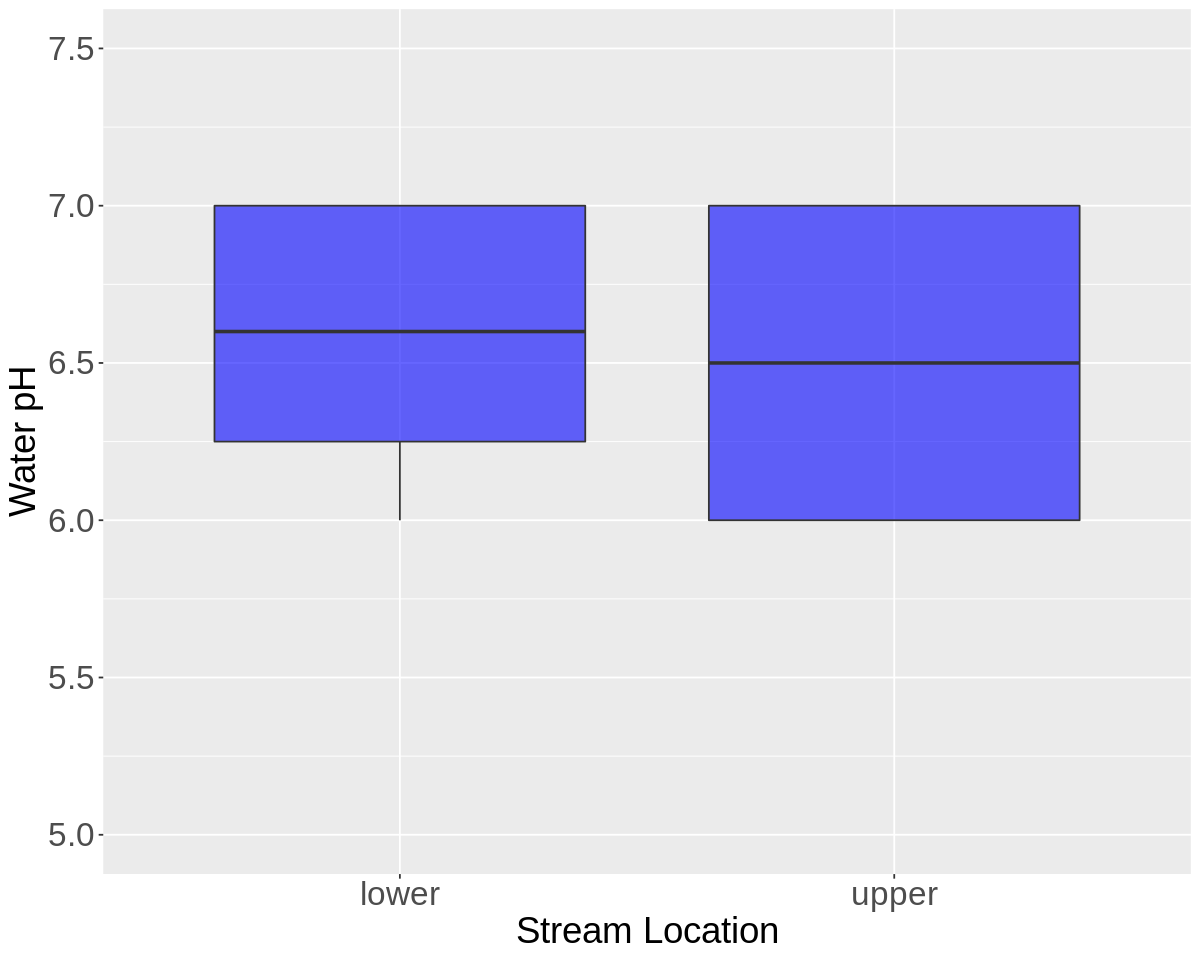

In [17]:
waterphbar <- 
    ph_only %>%
    select(Site, Water.pH) %>%
    ggplot(aes(x = Site, y = Water.pH)) +
    geom_boxplot(fill = "blue", alpha = 0.6) +
    labs(x= "Stream Location", y = "Water pH") +
    scale_y_continuous(limits = c(5,7.5), breaks=seq(0,14,0.5)) +
    theme(legend.key.size = unit(2, 'cm'), legend.title = element_text(size=14),  legend.text= element_text(size=12), axis.text=element_text(size=20), axis.title=element_text(size=22)) 

waterphbar

# UNPAIR T-TEST(also called independent sample t-test)

In [18]:
# setting up for unpaired t-test
lower_soilpH <- 
    ph_only %>%
    filter(Site == "lower") %>%
    select(Soil.pH)

upper_soilpH <- 
    ph_only %>%
    filter(Site == "upper") %>%
    select(Soil.pH)

lower_waterpH <- 
    ph_only %>%
    filter(Site == "lower") %>%
    select(Water.pH)

upper_waterpH <- 
    ph_only %>%
    filter(Site == "upper") %>%
    select(Water.pH)

In [19]:
# unpaired t-test soil_pH 
t.test_hypo_test_soil_pH <- 
    broom::tidy(
        t.test(x = lower_soilpH,
               y = upper_soilpH, 
               alternative = "two.sided", var.equal = TRUE, conf.level = 0.95)) %>%
        rename(obs.test.stat. = estimate, mean.lower = estimate1, mean.upper = estimate2, degree.of.freedom = parameter)

hypo_test_soil_pH_stat <- t.test(lower_soilpH, upper_soilpH, var.equal = TRUE)

t.test_hypo_test_soil_pH
hypo_test_soil_pH_stat

obs.test.stat.,mean.lower,mean.upper,statistic,p.value,degree.of.freedom,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5369565,7.06087,6.523913,3.973734,0.0002591918,44,0.2646271,0.8092859,Two Sample t-test,two.sided



	Two Sample t-test

data:  lower_soilpH and upper_soilpH
t = 3.9737, df = 44, p-value = 0.0002592
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2646271 0.8092859
sample estimates:
mean of x mean of y 
 7.060870  6.523913 


In [20]:
# unpaired t-test water_pH 

t.test_hypo_test_water_pH <- 
    broom::tidy(
        t.test(x = lower_waterpH,
               y = upper_waterpH,
               alternative = "two.sided", var.equal = TRUE, conf.level = 0.95)) %>%
        rename(obs.test.stat. = estimate, mean.lower_stream = estimate1, mean.upper_stream = estimate2, degree.of.freedom = parameter) 

hypo_test_water_pH_stat <- t.test(lower_waterpH, upper_waterpH, var.equal = TRUE)

t.test_hypo_test_water_pH
hypo_test_water_pH_stat

obs.test.stat.,mean.lower_stream,mean.upper_stream,statistic,p.value,degree.of.freedom,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1343478,6.597826,6.463478,1.054115,0.2975843,44,-0.1225123,0.391208,Two Sample t-test,two.sided



	Two Sample t-test

data:  lower_waterpH and upper_waterpH
t = 1.0541, df = 44, p-value = 0.2976
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1225123  0.3912080
sample estimates:
mean of x mean of y 
 6.597826  6.463478 


# SOIL VS WATER - LINEAR REGRESSION

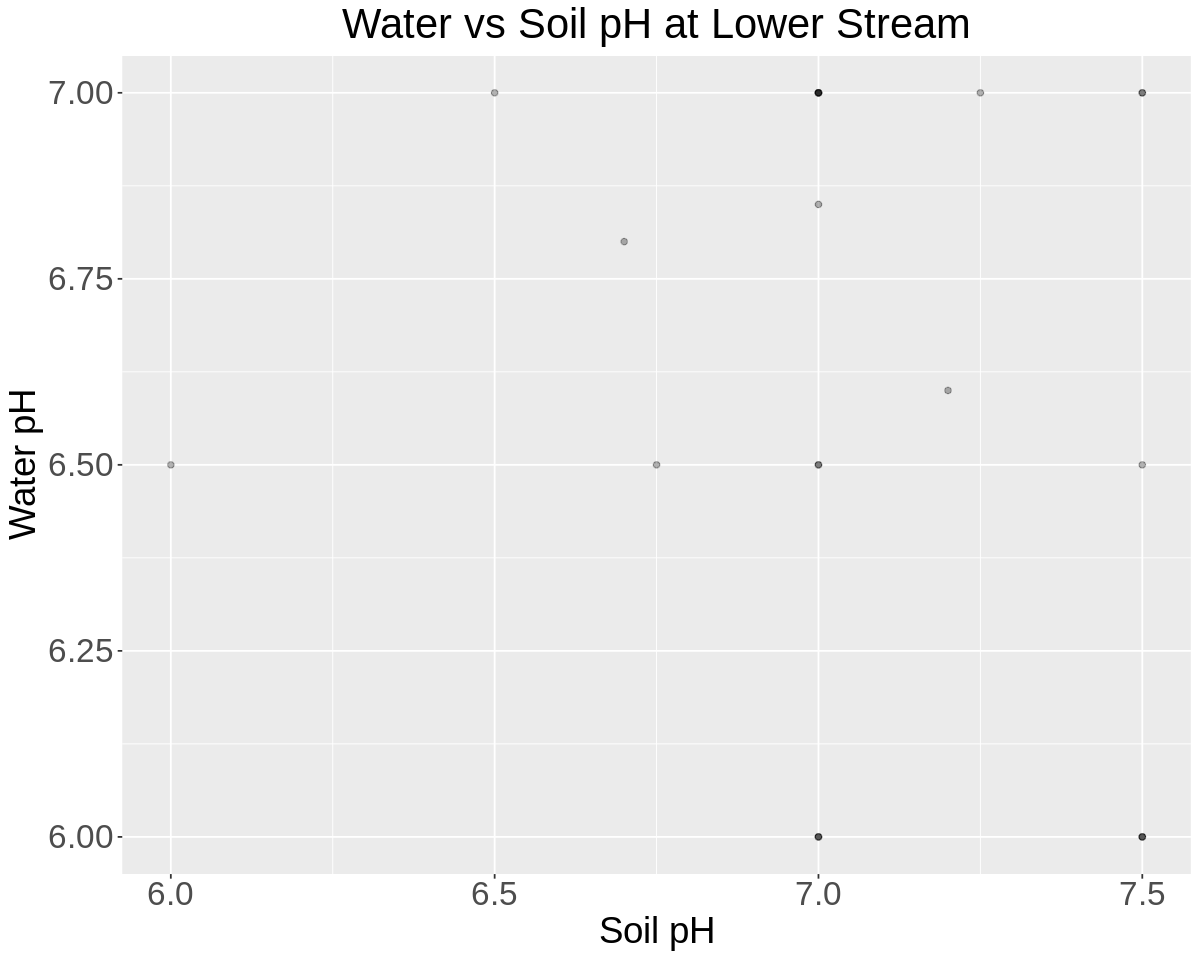

In [21]:
waterphbar <- 
    ph_only %>%
    filter(Site == "lower") %>%
    ggplot(aes(x = Soil.pH, y = Water.pH)) +
    geom_point(fill = "blue", alpha = 0.3) +
    labs(x= "Soil pH", y = "Water pH", title = "Water vs Soil pH at Lower Stream") +
    theme(plot.title = element_text(size=25, hjust = 0.5), axis.text=element_text(size=20), axis.title=element_text(size=22)) 

waterphbar

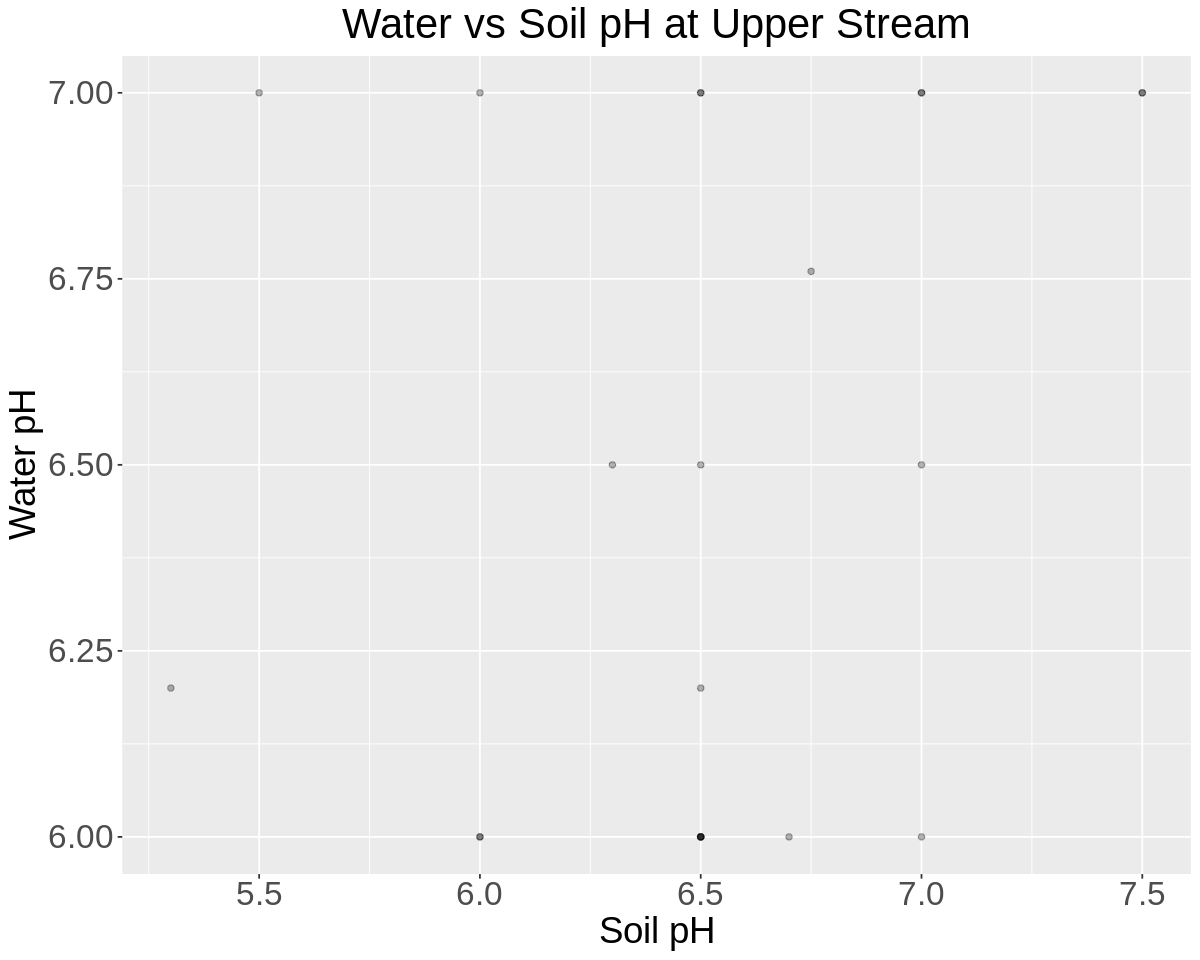

In [22]:
waterphbar <- 
    ph_only %>%
    filter(Site == "upper") %>%
    ggplot(aes(x = Soil.pH, y = Water.pH)) +
    geom_point(fill = "blue", alpha = 0.3) +
    labs(x= "Soil pH", y = "Water pH", title = "Water vs Soil pH at Upper Stream") +
    theme(plot.title = element_text(size=25, hjust = 0.5), axis.text=element_text(size=20), axis.title=element_text(size=22)) 

waterphbar